In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import platform
from IPython.display import Image

# Set font for plots
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"

# Set specs for pandas
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 700)
pd.set_option("precision", 2)

In [2]:
[f for f in os.listdir() if 'Iterations' not in str(f) and '.csv' in str(f) and "RDF_Comp" not in str(f)]

['MinGHG-C70.csv',
 'MinGHG-C50.csv',
 'MinGHG-C60.csv',
 'MinGHG-C40.csv',
 'MinGHG-C80.csv',
 'MinGHG.csv',
 'MinCost-SO.csv',
 'MinGHG-NoGC-AnF-SO.csv',
 'MinGHG-NoGC-AnF.csv',
 'MinCost.csv',
 'MinGHG_SO.csv']

In [3]:
files = [
    'MinGHG.csv',
    'MinGHG-C80.csv',
    'MinGHG-C70.csv',
    'MinGHG-C60.csv',
    'MinGHG-C50.csv',
    'MinGHG-C40.csv',
    'MinCost.csv']

files2 = ['MinGHG-NoGC-AnF-SO.csv',
          'MinCost-SO.csv',
          'MinGHG_SO.csv',
          'MinGHG-NoGC-AnF.csv']

files3 = ['MinGHG.csv',
          'MinGHG_SO.csv',
          'MinGHG-NoGC-AnF.csv',
          'MinGHG-NoGC-AnF-SO.csv',
          'MinCost.csv',
          'MinCost-SO.csv']

In [4]:
TrtmntP = ['LF', 'WTE', 'RDF', 'GC', 'Composting', 'AD', 'AnF', 'SS_MRF', 'Reprocessing']
P_color = {'LF': "gray", 'WTE': 'tab:red', 'RDF': 'tab:orange', 'GC': 'tab:brown',
           'Composting': 'tab:green', 'AD': 'lime', 'AnF': 'tab:olive', 'SS_MRF': 'tab:cyan',
           'Reprocessing': 'tab:blue'}
P_color_li = [P_color[p] for p in TrtmntP]
index = ['Diversion','GWP', 'Operation Cost', 'Capital cost', 'Total cost',
 'CED', 'Acidification', 'Eutrophication', 'Photochemical smog', 'Ecotoxicity',
 'Human toxicity', 'SF', 'MF', 'COM', 'LF', 'WTE', 'RDF', 'GC', 'Composting',
 'AD', 'AnF', 'SS_MRF', 'Reprocessing']
Result_DF = pd.DataFrame(index=index)
for f in files:
    data = pd.read_csv(f, index_col=0)
    Result_DF[f.strip('.csv')] = data['Value']
Result_DF['Unit'] = data['Unit']
total_mass = Result_DF.loc[['SF', 'MF', 'COM'], 'MinGHG'].sum()
MassFlows = Result_DF.loc[TrtmntP, Result_DF.columns[:-1]] / total_mass
Result_DF.head()

,MinGHG,MinGHG-C80,MinGHG-C70,MinGHG-C60,MinGHG-C50,MinGHG-C40,MinCost,Unit
Diversion,86.09,86.47,86.82,87.18,87.47,58.86,25.55,%
GWP,118.03,127.41,137.82,148.24,165.26,276.24,427.19,kg CO2/Mg
Operation Cost,47.06,41.46,33.95,26.45,19.41,22.35,28.61,$/Mg
Capital cost,39.96,38.54,36.05,33.55,30.59,17.64,2.88,$/Mg
Total cost,87.02,80.00,70.00,60.00,50.00,40.00,31.49,$/Mg


In [5]:
def mit_cost(i, j):
    return (Result_DF[j]['Total cost'] - Result_DF[i]['Total cost'])/ (Result_DF[i]['GWP'] - Result_DF[j]['GWP'])

def avg_cost(i, j):
    return (Result_DF[j]['Total cost'] + Result_DF[i]['Total cost']) /2

In [14]:
x_m = []
y_m = []
for i in range(len(Result_DF.columns)-2):
    y_m.append(mit_cost(Result_DF.columns[i], Result_DF.columns[i+1]))
    x_m.append(avg_cost(Result_DF.columns[i], Result_DF.columns[i+1]))
np.round(y_m,2)

array([0.75, 0.96, 0.96, 0.59, 0.09, 0.06])

In [7]:
Result_DF_2 = pd.DataFrame(index=index)
for f in files2:
    data = pd.read_csv(f, index_col=0)
    Result_DF_2[f.strip('.csv')] = data['Value']
Result_DF_2['Unit'] = data['Unit']
MassFlows_2 = Result_DF_2.loc[TrtmntP, Result_DF_2.columns[:-1]] / total_mass
Result_DF_2.head()

,MinGHG-NoGC-AnF-SO,MinCost-SO,MinGHG_SO,MinGHG-NoGC-AnF,Unit
Diversion,89.06,46.98,87.61,87.27,%
GWP,256.59,444.57,180.52,181.32,kg CO2/Mg
Operation Cost,41.02,54.63,58.79,19.18,$/Mg
Capital cost,34.56,3.65,40.19,31.21,$/Mg
Total cost,75.59,58.28,98.98,50.38,$/Mg


In [8]:
Result_DF_3 = pd.DataFrame(index=index)
for f in files3:
    data = pd.read_csv(f, index_col=0)
    Result_DF_3[f.strip('.csv')] = data['Value']
Result_DF_3['Unit'] = data['Unit']
MassFlows_3 = Result_DF_3.loc[TrtmntP, Result_DF_3.columns[:-1]] / total_mass
Result_DF_3.head()

,MinGHG,MinGHG_SO,MinGHG-NoGC-AnF,MinGHG-NoGC-AnF-SO,MinCost,MinCost-SO,Unit
Diversion,86.09,87.61,87.27,89.06,25.55,46.98,%
GWP,118.03,180.52,181.32,256.59,427.19,444.57,kg CO2/Mg
Operation Cost,47.06,58.79,19.18,41.02,28.61,54.63,$/Mg
Capital cost,39.96,40.19,31.21,34.56,2.88,3.65,$/Mg
Total cost,87.02,98.98,50.38,75.59,31.49,58.28,$/Mg


c:\users\msardar2\.conda\envs\dev\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


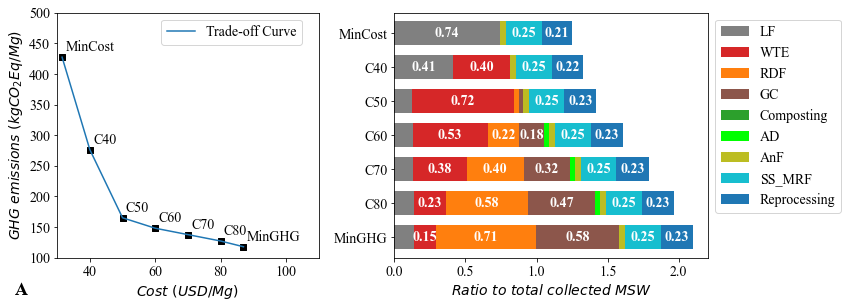

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5), gridspec_kw={'width_ratios': [1, 1.2]})
x = Result_DF.loc['Total cost', Result_DF.columns[:-1]]
y = Result_DF.loc['GWP', Result_DF.columns[:-1]]
ax1.scatter(x=x, y=y, marker='s', c='k')
ax1.plot(x, y, label='Trade-off Curve')
ax1.set_ylabel(r"$GHG\ emissions\ (kg CO_2 Eq/Mg)$")
ax1.set_xlabel(r"$Cost\ (USD/Mg)$")
ax1.set_ylim(100, 500)
ax1.set_xlim(30, 110)

label_dict = {
    'MinGHG': "MinGHG",
    'MinGHG-C80': "C80",
    'MinGHG-C70': "C70",
    'MinGHG-C60': "C60",
    'MinGHG-C50': "C50",
    'MinGHG-C40': "C40",
    'MinCost': "MinCost"}


for l in x.index:
    ax1.text(x[l]+1, y[l]+5, label_dict[l], ha='left', va='bottom')



# ax1.scatter(x=Result_DF_2.loc['Total cost', ["MinGHG-NoGC-AnF-SO", "MinCost-SO", "MinGHG_SO"]],
#             y=Result_DF_2.loc['GWP', ["MinGHG-NoGC-AnF-SO", "MinCost-SO", "MinGHG_SO"]],
#             marker='d', c='g', label='Require SO')
# ax1.scatter(x=Result_DF_2.loc['Total cost', ["MinGHG-NoGC-AnF"]],
#             y=Result_DF_2.loc['GWP', ["MinGHG-NoGC-AnF"]],
#             marker='o', c='b', label='Require SO')
# for i in range(len(label)):
#     ax.text(x[i], y[i], label[i], ha='center', va='top')


MassFlows.T.plot.barh(stacked=True, ax=ax2, width=0.7, color=P_color_li)
ax2.set_xlabel(r"$Ratio\ to\ total\ collected\ MSW$")


def format_lable(values):
    lables = []
    for x in values:
        lables.append(('%0.2f' % x) if x > 0.15 else '')
    return lables

for c in ax2.containers:
    ax2.bar_label(c, label_type='center', labels=format_lable(c.datavalues), color='w',
                  font={'weight': 'bold', 'size': 14})
ax2.yaxis.set_ticklabels([label_dict[l] for l in MassFlows.T.index])

ax1.legend(bbox_to_anchor=(0.37, 1), loc='upper left', frameon=True)
ax2.legend(bbox_to_anchor=(1, 1))

ax1.text(17, 40, 'A', weight='bold', fontsize=18)

fig.tight_layout()
fig.savefig('Opt_tradeoff_A.png', dpi=300)

c:\users\msardar2\.conda\envs\dev\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


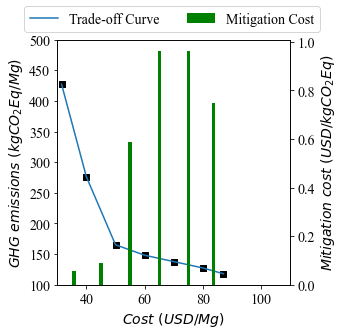

In [10]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 4.5))
x = Result_DF.loc['Total cost', Result_DF.columns[:-1]]
y = Result_DF.loc['GWP', Result_DF.columns[:-1]]
ax1.scatter(x=x, y=y, marker='s', c='k')
ax1.plot(x, y, label='Trade-off Curve')
ax1.set_ylabel(r"$GHG\ emissions\ (kg CO_2 Eq/Mg)$")
ax1.set_xlabel(r"$Cost\ (USD/Mg)$")
ax1.set_ylim(100, 500)
ax1.set_xlim(30, 110)

label_dict = {
    'MinGHG': "MinGHG",
    'MinGHG-C80': "C80",
    'MinGHG-C70': "C70",
    'MinGHG-C60': "C60",
    'MinGHG-C50': "C50",
    'MinGHG-C40': "C40",
    'MinCost': "MinCost"}



axx = ax1.twinx()
axx.bar(x=x_m, height=y_m, width=1.1, color='g', label='Mitigation Cost')
axx.set_ylabel(r"$Mitigation\ cost\ (USD/kg CO_2 Eq)$")

# ax1.scatter(x=Result_DF_2.loc['Total cost', ["MinGHG-NoGC-AnF-SO", "MinCost-SO", "MinGHG_SO"]],
#             y=Result_DF_2.loc['GWP', ["MinGHG-NoGC-AnF-SO", "MinCost-SO", "MinGHG_SO"]],
#             marker='d', c='g', label='Require SO')
# ax1.scatter(x=Result_DF_2.loc['Total cost', ["MinGHG-NoGC-AnF"]],
#             y=Result_DF_2.loc['GWP', ["MinGHG-NoGC-AnF"]],
#             marker='o', c='b', label='Require SO')
# for i in range(len(label)):
#     ax.text(x[i], y[i], label[i], ha='center', va='top')


MassFlows.T.plot.barh(stacked=True, ax=ax2, width=0.7, color=P_color_li)

fig.legend(bbox_to_anchor=(0.5, 1.06), loc='upper center', frameon=True, ncol=2)

fig.tight_layout()
fig.savefig('Mitigation Cost.png', dpi=300, bbox_inches='tight')

c:\users\msardar2\.conda\envs\dev\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


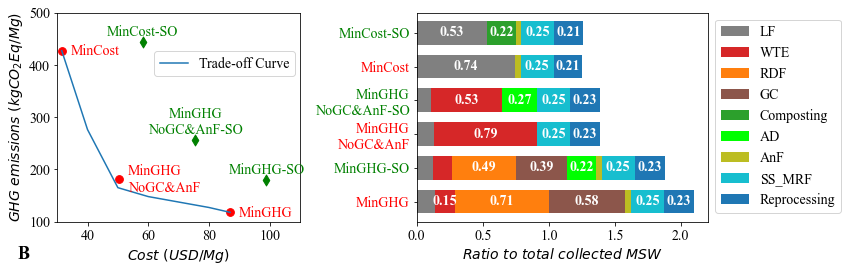

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 1.2]})
x = Result_DF.loc['Total cost', Result_DF.columns[:-1]]
y = Result_DF.loc['GWP', Result_DF.columns[:-1]]
ax1.plot(x, y, label='Trade-off Curve')

ax1.set_ylabel(r"$GHG\ emissions\ (kg CO_2 Eq/Mg)$")
ax1.set_xlabel(r"$Cost\ (USD/Mg)$")


label_dict = {
    'MinGHG': "MinGHG",
    'MinGHG_SO': "MinGHG-SO",
    'MinGHG-NoGC-AnF': "MinGHG\nNoGC&AnF",
    'MinGHG-NoGC-AnF-SO': "MinGHG\nNoGC&AnF-SO",
    'MinCost': "MinCost",
    'MinCost-SO': "MinCost-SO"}

x_1=Result_DF_3.loc['Total cost', ["MinGHG-NoGC-AnF-SO", "MinCost-SO", "MinGHG_SO"]]
y_1=Result_DF_3.loc['GWP', ["MinGHG-NoGC-AnF-SO", "MinCost-SO", "MinGHG_SO"]]
ax1.scatter(x=x_1, y=y_1,
            marker='d', c='g', s=60)

x_2=Result_DF_3.loc['Total cost', ["MinCost", "MinGHG", "MinGHG-NoGC-AnF"]]
y_2=Result_DF_3.loc['GWP', ["MinCost", "MinGHG", "MinGHG-NoGC-AnF"]]
ax1.scatter(x=x_2, y=y_2,
            marker='o', c='r', s=60)

for l in x_1.index:
    ax1.text(x_1[l], y_1[l]+5, label_dict[l], ha='center', va='bottom', color='g')
for l in x_2.index:
    ax1.text(x_2[l]+3, y_2[l], label_dict[l], ha='left', va='center', color='r')
    
MassFlows_3.T.plot.barh(stacked=True, ax=ax2, width=0.7, color=P_color_li)
ax2.set_xlabel(r"$Ratio\ to\ total\ collected\ MSW$")
ax2.yaxis.set_ticklabels([label_dict[l] for l in MassFlows_3.T.index])


def format_lable(values):
    lables = []
    for x in values:
        lables.append(('%0.2f' % x) if x > 0.15 else '')
    return lables

for c in ax2.containers:
    ax2.bar_label(c, label_type='center', labels=format_lable(c.datavalues), color='w',
                  font={'weight': 'bold', 'size': 14})

for t in ax2.yaxis.get_ticklabels():
    if 'SO' in t.get_text():
        t.set_color('green')
    else:
        t.set_color('red')

ax1.legend(bbox_to_anchor=(0.37, 0.85), loc='upper left', frameon=True)
ax2.legend(bbox_to_anchor=(1, 1))

ax1.set_ylim(100, 500)
ax1.set_xlim(30, 110)

ax1.text(17, 30, 'B', weight='bold', fontsize=18)

fig.tight_layout()
fig.savefig('Opt_tradeoff_B.png', dpi=300)

## Mix figure

c:\users\msardar2\.conda\envs\dev\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\users\msardar2\.conda\envs\dev\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


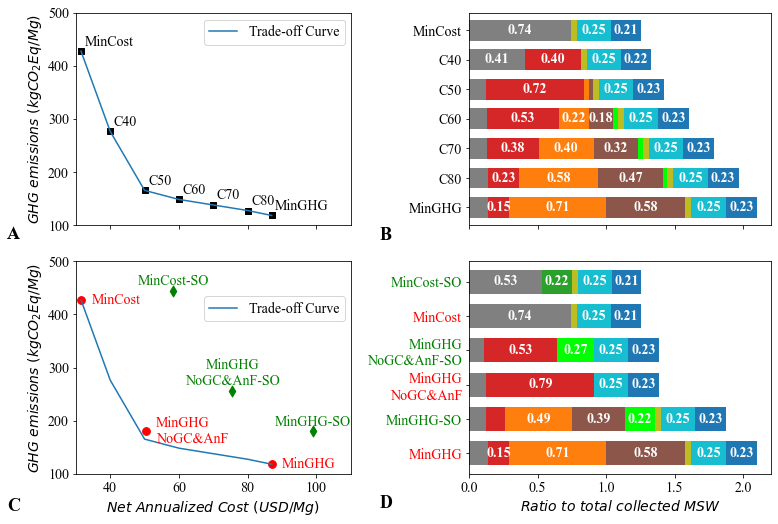

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(11, 7.5), gridspec_kw={'width_ratios': [1, 1.1]}, sharex='col')
x = Result_DF.loc['Total cost', Result_DF.columns[:-1]]
y = Result_DF.loc['GWP', Result_DF.columns[:-1]]
ax1.scatter(x=x, y=y, marker='s', c='k')
ax1.plot(x, y, label='Trade-off Curve')
ax1.set_ylabel(r"$GHG\ emissions\ (kg CO_2 Eq/Mg)$")
ax1.set_xlabel(r"$Cost\ (USD/Mg)$")
ax1.set_ylim(100, 500)
ax1.set_xlim(30, 110)

label_dict = {
    'MinGHG': "MinGHG",
    'MinGHG-C80': "C80",
    'MinGHG-C70': "C70",
    'MinGHG-C60': "C60",
    'MinGHG-C50': "C50",
    'MinGHG-C40': "C40",
    'MinCost': "MinCost"}


for l in x.index:
    ax1.text(x[l]+1, y[l]+5, label_dict[l], ha='left', va='bottom')



# ax1.scatter(x=Result_DF_2.loc['Total cost', ["MinGHG-NoGC-AnF-SO", "MinCost-SO", "MinGHG_SO"]],
#             y=Result_DF_2.loc['GWP', ["MinGHG-NoGC-AnF-SO", "MinCost-SO", "MinGHG_SO"]],
#             marker='d', c='g', label='Require SO')
# ax1.scatter(x=Result_DF_2.loc['Total cost', ["MinGHG-NoGC-AnF"]],
#             y=Result_DF_2.loc['GWP', ["MinGHG-NoGC-AnF"]],
#             marker='o', c='b', label='Require SO')
# for i in range(len(label)):
#     ax.text(x[i], y[i], label[i], ha='center', va='top')


MassFlows.T.plot.barh(stacked=True, ax=ax2, width=0.7, color=P_color_li)
ax2.set_xlabel(r"$Ratio\ to\ total\ collected\ MSW$")


def format_lable(values):
    lables = []
    for x in values:
        lables.append(('%0.2f' % x) if x > 0.15 else '')
    return lables

for c in ax2.containers:
    ax2.bar_label(c, label_type='center', labels=format_lable(c.datavalues), color='w',
                  font={'weight': 'bold', 'size': 14})
ax2.yaxis.set_ticklabels([label_dict[l] for l in MassFlows.T.index])

ax1.legend(bbox_to_anchor=(0.44, 1), loc='upper left', frameon=True)
ax2.get_legend().remove()

ax1.text(10, 75, 'A', weight='bold', fontsize=18)
ax2.text(-0.65, -1.10, 'B', weight='bold', fontsize=18)


x = Result_DF.loc['Total cost', Result_DF.columns[:-1]]
y = Result_DF.loc['GWP', Result_DF.columns[:-1]]
ax3.plot(x, y, label='Trade-off Curve')

ax3.set_ylabel(r"$GHG\ emissions\ (kg CO_2 Eq/Mg)$")
ax3.set_xlabel(r"$Net\ Annualized\ Cost\ (USD/Mg)$")


label_dict = {
    'MinGHG': "MinGHG",
    'MinGHG_SO': "MinGHG-SO",
    'MinGHG-NoGC-AnF': "MinGHG\nNoGC&AnF",
    'MinGHG-NoGC-AnF-SO': "MinGHG\nNoGC&AnF-SO",
    'MinCost': "MinCost",
    'MinCost-SO': "MinCost-SO"}

x_1=Result_DF_3.loc['Total cost', ["MinGHG-NoGC-AnF-SO", "MinCost-SO", "MinGHG_SO"]]
y_1=Result_DF_3.loc['GWP', ["MinGHG-NoGC-AnF-SO", "MinCost-SO", "MinGHG_SO"]]
ax3.scatter(x=x_1, y=y_1,
            marker='d', c='g', s=60)

x_2=Result_DF_3.loc['Total cost', ["MinCost", "MinGHG", "MinGHG-NoGC-AnF"]]
y_2=Result_DF_3.loc['GWP', ["MinCost", "MinGHG", "MinGHG-NoGC-AnF"]]
ax3.scatter(x=x_2, y=y_2,
            marker='o', c='r', s=60)

for l in x_1.index:
    ax3.text(x_1[l], y_1[l]+5, label_dict[l], ha='center', va='bottom', color='g')
for l in x_2.index:
    ax3.text(x_2[l]+3, y_2[l], label_dict[l], ha='left', va='center', color='r')
    
MassFlows_3.T.plot.barh(stacked=True, ax=ax4, width=0.7, color=P_color_li)
ax4.set_xlabel(r"$Ratio\ to\ total\ collected\ MSW$")
ax4.yaxis.set_ticklabels([label_dict[l] for l in MassFlows_3.T.index])


def format_lable(values):
    lables = []
    for x in values:
        lables.append(('%0.2f' % x) if x > 0.15 else '')
    return lables

for c in ax4.containers:
    ax4.bar_label(c, label_type='center', labels=format_lable(c.datavalues), color='w',
                  font={'weight': 'bold', 'size': 14})

for t in ax4.yaxis.get_ticklabels():
    if 'SO' in t.get_text():
        t.set_color('green')
    else:
        t.set_color('red')

ax3.legend(bbox_to_anchor=(0.44, 0.87), loc='upper left', frameon=True)
ax4.get_legend().remove()

ax3.set_ylim(100, 500)
ax3.set_xlim(30, 110)

ax3.text(10, 30, 'C', weight='bold', fontsize=18)
ax4.text(-0.65, -1.58, 'D', weight='bold', fontsize=18)

fig.tight_layout()
fig.savefig('Opt_tradeoff.png', dpi=300)

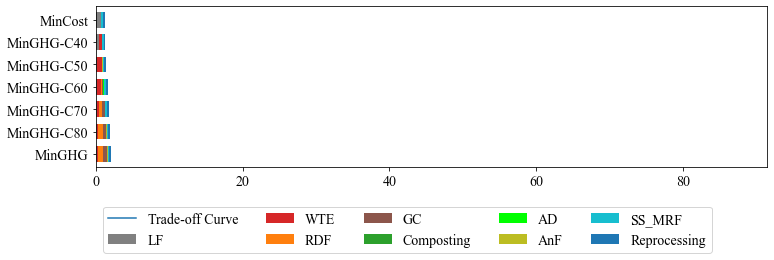

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(11, 4))
MassFlows.T.plot.barh(stacked=True, ax=ax, width=0.7, color=P_color_li)
ax.plot(x, y, label='Trade-off Curve')
ax.legend(bbox_to_anchor=(0, -.2), loc='upper left', frameon=True, ncol=5)
fig.tight_layout()
fig.savefig('Legend.png', dpi=300)